In [1]:
import sys
sys.path.append('/cluster/sj1/bb_opt/scripts')

In [2]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collect_stats as cs

%matplotlib inline

In [245]:
import collect_stats as cs

In [4]:
exp_folder = '/cluster/sj1/bb_opt/experiments'
test_filepath = '/cluster/sj1/bb_opt/data/tatsu_pbm/test_files'
filedir = '/cluster/sj1/bb_opt/data/paper_data2'
num_tfs_to_test = 38
batches = [10, 100]
num_acks = 30

In [5]:
with open(test_filepath, 'r') as f:
    filenames = [k.strip() for k in f.readlines()][:num_tfs_to_test]

In [6]:
def sigmoid(x, exp=np.exp):
  return 1.0 / (1.0 + exp(-x))

In [7]:
filenames = [
    'ARX_L343Q_R1_8mers.txt',
    'BCL6_H676Y_R1_8mers.txt',
    'CRX_E80A_R1_8mers.txt',
    'EGR2_D383Y_R1_8mers.txt',
    'ESX1_K193R_R1_8mers.txt',
    'FOXC1_F112S_R1_8mers.txt',
    'GFI1B_A204T_R1_8mers.txt',
    'GFI1_L400F_R1_8mers.txt',
    'HESX1_E149K_R1_8mers.txt',
    'HOXC4_N178S_R1_8mers.txt',
    'HOXD13_I322L_R1_8mers.txt',
    'ISX_R83Q_R1_8mers.txt',
    'KLF11_R402Q_R1_8mers.txt',
    'KLF1_E325K_R1_8mers.txt',
    'MSX2_P148H_R1_8mers.txt',
    'NKX2-5_K183E_R1_8mers.txt',
    'NR1H4_C144R_R1_8mers.txt',
    'NR2E3_G56R_R1_8mers.txt',
    'OVOL2_D228E_R1_8mers.txt',
    'PAX3_G48R_R1_8mers.txt',
    'PAX4_R183C_R1_8mers.txt',
    'PAX6_A79E_R1_8mers.txt',
    'PAX7_P112L_R1_8mers.txt',
    'PBX4_R215Q_R1_8mers.txt',
    'PHOX2B_Q143R_R1_8mers.txt',
    'PITX2_L100Q_R1_8mers.txt',
    'POU3F4_A237G_R1_8mers.txt',
    'POU4F3_K277R_R1_8mers.txt',
    'POU6F2_E639K_R1_8mers.txt',
    'PROP1_R112Q_R1_8mers.txt',
    'SIX6_H141N_R1_8mers.txt',
    'SNAI2_D119E_R1_8mers.txt',
    'VAX2_L139M_R1_8mers.txt',
    'VENTX_E101K_R1_8mers.txt',
    'VSX1_G160D_R1_8mers.txt',
    'WT1_F392L_R1_8mers.txt',
    'ZNF200_H322Y_R1_8mers.txt',
    'ZNF655_E327G_R1_8mers.txt',
]

In [8]:
tf_max = {}
for tf in filenames:
    labels = np.load(filedir + "/" + tf + "/labels.npy")
    labels = np.log(labels)
    tf_max[tf] = float(labels.max())

In [448]:
to_read = {
    #'ensemble3/o_none_ucb_new_init_modelseed_' : [None, 'new_init'],
    #'ensemble3/o_none_ucb_finetune_modelseed_' : [None, 'finetune'],
    #'ensemble3/o_none_ucb_nsplit_5_new_init_modelseed_' : [None, 'nsplit_5_new_init'],
    #'ensemble3/o_none_ucb_nsplits_5_finetune_modelseed_' : [None, 'nsplit_5_finetune'],
    #'ensemble3/o_none_ucb_maxvar_g00020510_finetune_modelseed_': [None, 'maxvar_g4_finetune'],
    #'ensemble3/o_none_ucb_maxinvar_g00020510_finetune_modelseed_' : [None, 'maxinvar_g4_finetune'],
    #'ensemble3/o_none_ucb_nocombine_gcutoff_finetune_modelseed_': [None, 'only_val2_finetune'],
    #'ensemble3/o_none_ucb_maxvar_g000205102040_finetune_modelseed_': [None, 'maxvar_g6_finetune'],
    #'ensemble3/o_none_ucb_maxvar_g000510204080_finetune_modelseed_': [None, 'maxvar_g80_finetune'],
    #'ensemble3/o_none_ucb_maxinvar_g000510204080_finetune_modelseed_': [None, 'maxinvar_g80_finetune'],
    #'ensemble3/o_empirical_cond_er_finetune_mes_': [None, 'finetune_mes'],
    #'ensemble3/o_empirical_cond_er_finetune_div_4_modelseed_': [None, 'finetune_cond_er_div_4'],
    #'ensemble4/o_none_ucb_finetune_modelseed_': [None, 'e4_finetune'],
    #'ensemble4/o_none_ucb_maxvar_g000510204080_finetune_modelseed_': [None, 'e4_maxvar_g80_finetune'],
    #'ensemble4/o_none_ucb_maxinvar_g000510204080_finetune_modelseed_': [None, 'e4_maxinvar_g80_finetune'],
    #'ensemble5/o_none_ucb_finetune_modelseed_': [None, 'e5_finetune'],
    #'ensemble5/o_none_ucb_maxvar_g000510204080_finetune_modelseed_': [None, 'e5_maxvar_g80_finetune'],
    #'ensemble5/o_none_ucb_maxinvar_g000510204080_finetune_modelseed_': [None, 'e5_maxinvar_g80_finetune'],
    #'ensemble5/o_empirical_cond_er_finetune_empirical_val_nll2_div_4_modelseed_': [None, 'e5_empirical_val_nll_div_4'],
    'ensemble6/o_none_ucb_finetune_modelseed_': [None, 'e6_finetune'],
}

In [449]:
for k in to_read:
    arrs[k] = to_read[k]

In [450]:
for experiment in to_read:
    print('reading', experiment)
    arrs[experiment][0] = cs.get_data(exp_folder, experiment, batches, num_samples=20)

reading ensemble6/o_none_ucb_finetune_modelseed_
reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5
reading sample 6
reading sample 7
reading sample 8
reading sample 9
reading sample 10
reading sample 11
reading sample 12
reading sample 13
reading sample 14
reading sample 15
reading sample 16
reading sample 17
reading sample 18
reading sample 19
reading sample 20


In [455]:
to_eval = [
    'ensemble5/o_none_ucb_finetune_modelseed_',
    'ensemble5/o_none_ucb_maxvar_g000510204080_finetune_modelseed_',
    'ensemble5/o_none_ucb_maxinvar_g000510204080_finetune_modelseed_',
    'ensemble5/o_empirical_cond_er_finetune_empirical_val_nll2_div_4_modelseed_',
    'ensemble6/o_none_ucb_finetune_modelseed_',
]

In [252]:
idx_data_extractor = lambda x : x['idx_frac'][0].item()

In [454]:
cs.prop_test(10, filenames, idx_data_extractor, arrs, [to_eval[-5], to_eval[-1]], 29, pval_threshold=0.05)

comparing e5_finetune e6_finetune
ARX_L343Q_R1_8mers.txt 0.011721039479888815 0.1826219528913498 0.20228658318519593 1
CRX_E80A_R1_8mers.txt 0.045910661099503945 0.13948170728981496 0.1629573166370392 1
ESX1_K193R_R1_8mers.txt 1.4452163660179238e-07 0.511280483007431 0.5321646392345428 1
GFI1B_A204T_R1_8mers.txt 4.213656068032075e-05 0.07606707345694304 0.09939024373888969 1
HESX1_E149K_R1_8mers.txt 1.897861579791644e-05 0.34359756037592887 0.4189024388790131 1
HOXC4_N178S_R1_8mers.txt 0.002237827001674998 0.45945122092962265 0.4810975670814514 1
count: 6/6


In [451]:
to_eval = [
    #'ensemble3/o_none_ucb_new_init_modelseed_',
    #'ensemble3/o_none_ucb_finetune_modelseed_',
    #'ensemble3/o_none_ucb_maxvar_g00020510_finetune_modelseed_',
    #'ensemble3/o_none_ucb_nsplit_5_new_init_modelseed_',
    #'ensemble3/o_none_ucb_nsplits_5_finetune_modelseed_',
    #'ensemble3/o_none_ucb_nocombine_gcutoff_finetune_modelseed_',
    #'ensemble3/o_none_ucb_maxvar_g000205102040_finetune_modelseed_',
    #'ensemble3/o_none_ucb_maxinvar_g00020510_finetune_modelseed_',
    #'ensemble3/o_none_ucb_maxvar_g000510204080_finetune_modelseed_',
    #'ensemble3/o_none_ucb_maxinvar_g000510204080_finetune_modelseed_',
    #'ensemble3/o_empirical_cond_er_finetune_mes_',
    #'ensemble3/o_empirical_cond_er_finetune_div_4_modelseed_',
    #'ensemble4/o_none_ucb_finetune_modelseed_',
    #'ensemble4/o_none_ucb_maxvar_g000510204080_finetune_modelseed_',
    #'ensemble4/o_none_ucb_maxinvar_g000510204080_finetune_modelseed_',
    'ensemble5/o_none_ucb_finetune_modelseed_',
    #'ensemble5/o_none_ucb_maxvar_g000510204080_finetune_modelseed_',
    #'ensemble5/o_none_ucb_maxinvar_g000510204080_finetune_modelseed_',
    #'ensemble5/o_empirical_cond_er_finetune_empirical_val_nll2_div_4_modelseed_',
    'ensemble6/o_none_ucb_finetune_modelseed_',
]

In [452]:
ack_iter = 29
for batch_size in [10]:
    print("BATCH SIZE", batch_size)
    for filename in filenames:
        print(filename)
        for experiment in to_eval:
            if len(arrs[experiment][0]) == 0:
                continue
            idx_frac = None
            num_used = 0
            val_nll = 0
            for stats in arrs[experiment][0]:
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                num_used += 1
                mean = 0
                for i in range(ack_iter+1):
                    mean += stats[filename][batch_size][i]['logging'][1]['best']['nll']
                mean /= ack_iter+1
                #val_nll += stats[filename][batch_size][0]['logging'][1]['best']['nll']
                val_nll += mean
                if idx_frac is None:
                    idx_frac = stats[filename][batch_size][ack_iter]['idx_frac']
                    #idx_frac = stats[filename][batch_size][ack_iter]['corr_stats'][1]
                else:
                    idx_frac = idx_frac + stats[filename][batch_size][ack_iter]['idx_frac']
                    #idx_frac = idx_frac + stats[filename][batch_size][ack_iter]['corr_stats'][1]
            if num_used > 0:
                idx_frac = idx_frac/num_used
                idx_frac = idx_frac.numpy()
                print(arrs[experiment][1] + ":", " ".join(("{:6.6f}".format(k) for k in idx_frac)), ";", "{:6.2f}".format(val_nll/num_used), "val_nll ;", str(num_used), "samples")

BATCH SIZE 10
ARX_L343Q_R1_8mers.txt
e5_finetune: 0.182622 0.094252 0.060566 0.037460 ;  -0.98 val_nll ; 20 samples
e6_finetune: 0.202287 0.101186 0.064761 0.038668 ;  -1.03 val_nll ; 20 samples
BCL6_H676Y_R1_8mers.txt
e5_finetune: 0.414177 0.163595 0.088735 0.045068 ;  -1.40 val_nll ; 20 samples
e6_finetune: 0.409451 0.164690 0.088948 0.045113 ;  -1.50 val_nll ; 20 samples
CRX_E80A_R1_8mers.txt
e5_finetune: 0.139482 0.110797 0.073138 0.042962 ;  -1.24 val_nll ; 20 samples
e6_finetune: 0.162957 0.120347 0.075585 0.043221 ;  -1.34 val_nll ; 20 samples
EGR2_D383Y_R1_8mers.txt
e5_finetune: 0.165396 0.072080 0.048024 0.031297 ;  -0.87 val_nll ; 20 samples
e6_finetune: 0.186890 0.080870 0.052584 0.032885 ;  -0.94 val_nll ; 20 samples
ESX1_K193R_R1_8mers.txt
e5_finetune: 0.511280 0.171350 0.088325 0.045379 ;  -1.66 val_nll ; 20 samples
e6_finetune: 0.532165 0.174726 0.089070 0.045501 ;  -1.83 val_nll ; 20 samples
FOXC1_F112S_R1_8mers.txt
e5_finetune: 0.214177 0.114720 0.072210 0.042423 ;  -1

IndexError: list index out of range

In [122]:
import collect_stats as cs

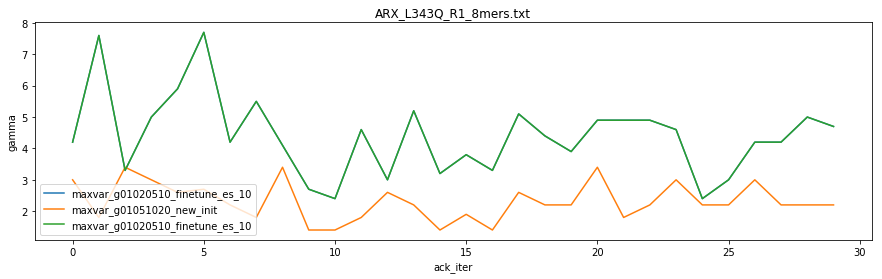

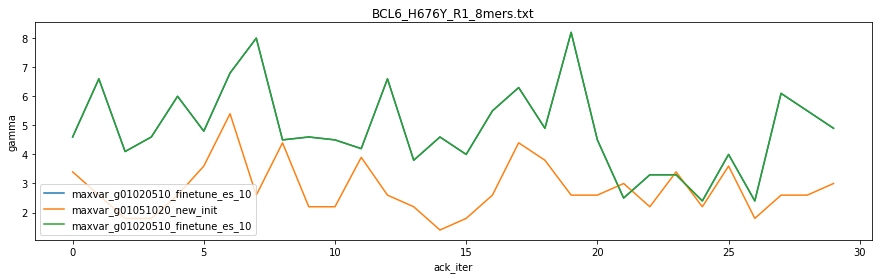

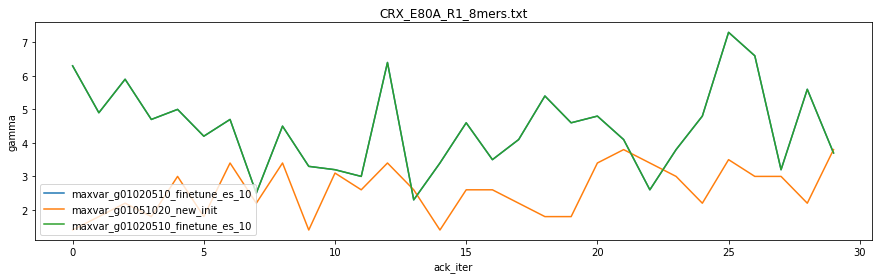

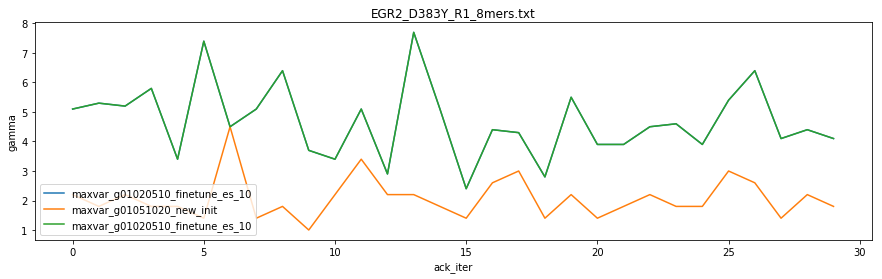

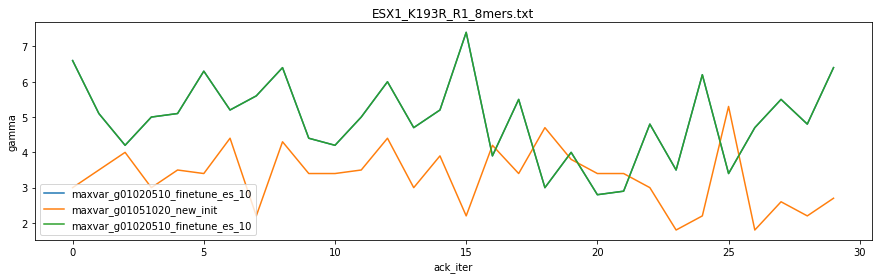

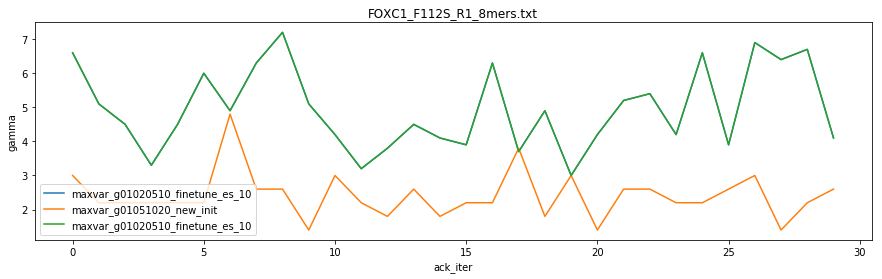

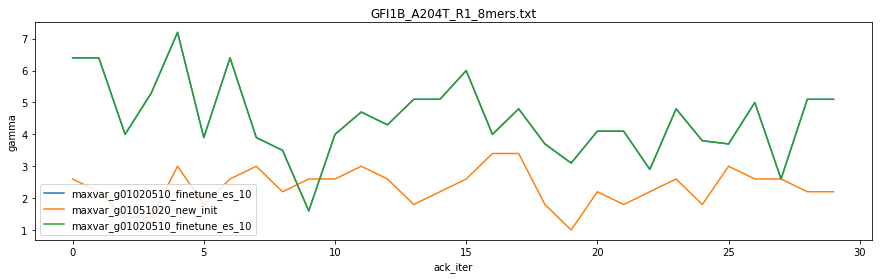

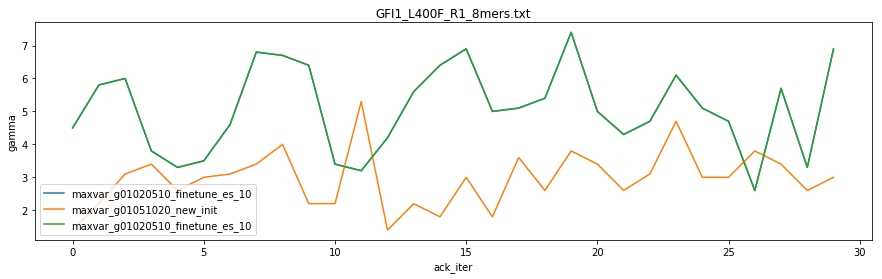

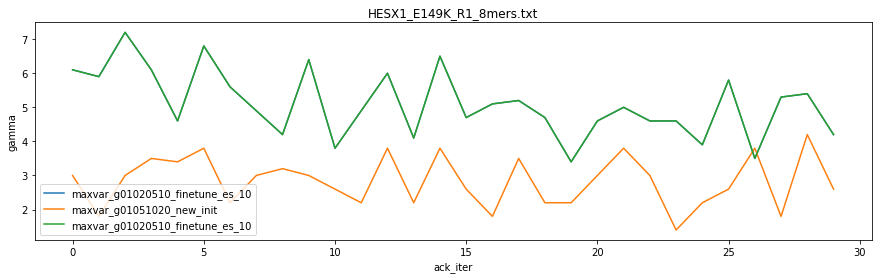

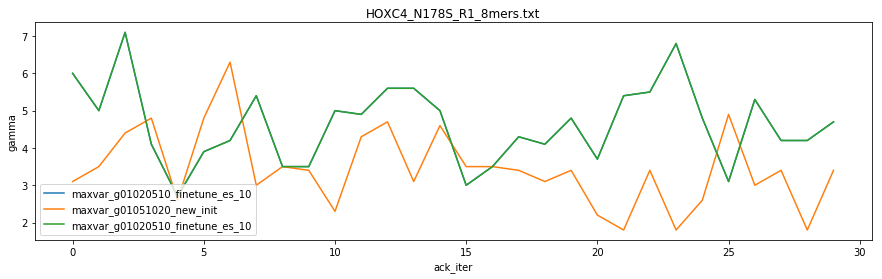

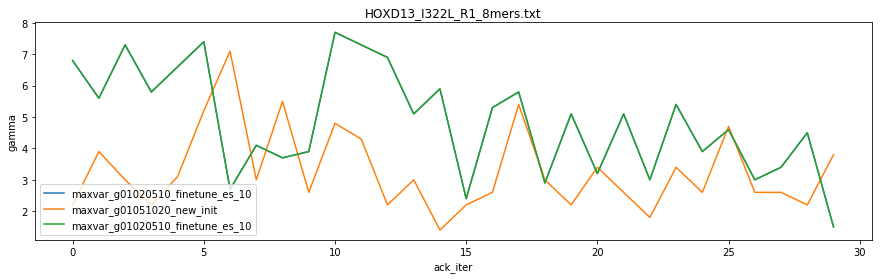

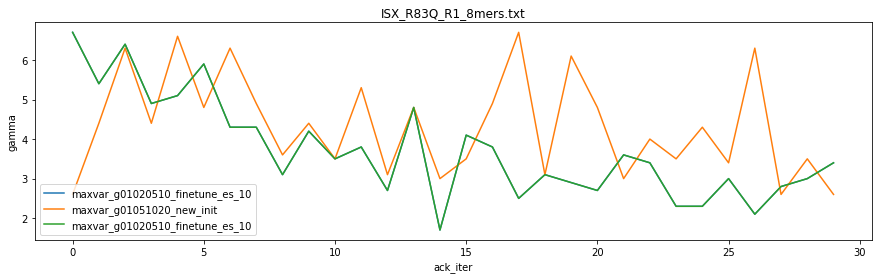

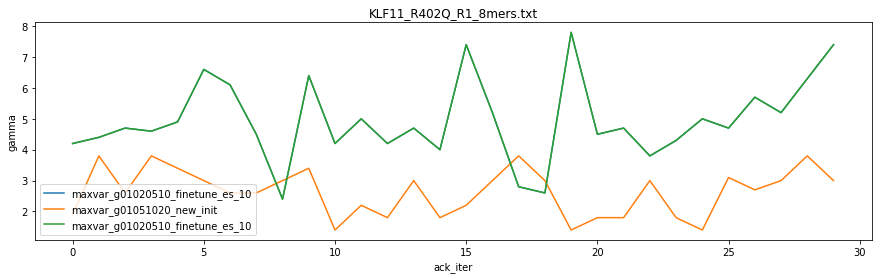

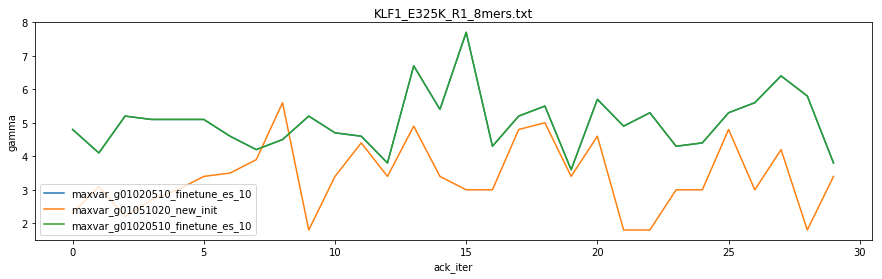

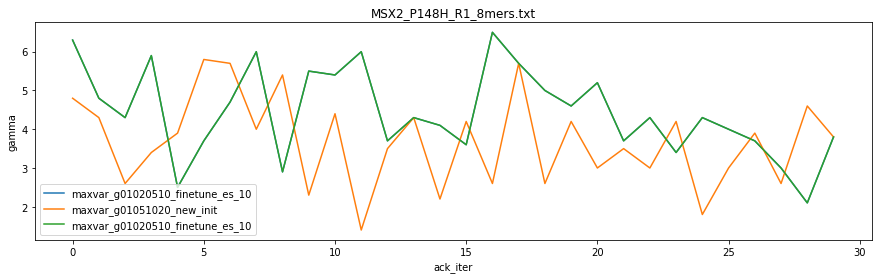

In [147]:
cs.plot_data_vs_ack_iter(
    10,
    filenames[0:15],
    'avg_seeds',
    'gamma',
    lambda x : x['best_gamma'] if x['best_gamma'] is not None else 0,
    30,
    arrs,
    to_eval,
    legend_loc=3,
)

In [ ]:
ack_iter = 0
for filename in filenames:
    print(filename)
    for batch_size in batches:
        for experiment in to_eval:
            best_value = 0
            num_used = 0
            for stats in arrs[experiment][0]:
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                num_used += 1
                best_value += stats[filename][batch_size][ack_iter]['logging'][9].item()
            if num_used > 0:
                best_value = best_value/num_used
                print(arrs[experiment][1] + ":", best_value, ";", str(num_used), "samples")

In [ ]:
test_properties = [
    'test_log_prob',
    'test_mse',
    'test_kt_corr',
    'test_std_list',
    'test_mse_std_corr'
]

avg = True

for prop in test_properties[1:2]:
    for filename in filenames[0:1]:
        print(filename)
        for batch_size in batches:
            for experiment in arrs:
                plt.figure(figsize=(15, 4))
                plt.subplot(121)
                prop_list = np.array([0.]*num_acks)
                num_used = 0
                for stats in arrs[experiment][0]:
                    if filename not in stats:
                        continue
                    if batch_size not in stats[filename]:
                        continue
                    if len(stats[filename][batch_size]) < num_acks:
                        continue
                    num_used += 1
                    if avg:
                        prop_list += np.array([stats[filename][batch_size][i][prop][0].item() for i in range(num_acks)])
                    else:
                        prop_list = [stats[filename][batch_size][i][prop][0].item() for i in range(num_acks)]
                    if not avg:
                        plt.plot(prop_list)
                if avg:
                    plt.plot(prop_list/num_used)
                plt.title(arrs[experiment][1] + "; " + prop + "; all")
                plt.subplot(122)
                prop_list = np.array([0.]*num_acks)
                num_used = 0
                for stats in arrs[experiment][0]:
                    if filename not in stats:
                        continue
                    if batch_size not in stats[filename]:
                        continue
                    if len(stats[filename][batch_size]) < num_acks:
                        continue
                    num_used += 1
                    if avg:
                        prop_list += np.array([stats[filename][batch_size][i][prop][1].item() for i in range(num_acks)])
                    else:
                        prop_list = [stats[filename][batch_size][i][prop][1].item() for i in range(num_acks)]
                    if not avg:
                        plt.plot(prop_list)
                if avg:
                    plt.plot(prop_list/num_used)
                plt.title(arrs[experiment][1] + "; " + prop + "; top 10%")

In [ ]:
ack_iter = 0
for filename in filenames[2:3]:
    print(filename)
    for batch_size in batches:
        for experiment in arrs:
            plt.figure(figsize=(15, 4))
            for stats in arrs[experiment][0]:
                #for i in range(num_acks):
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                prop_list = stats[filename][batch_size][ack_iter]['logging'][-1].numpy()
                plt.plot(prop_list)
                plt.title(arrs[experiment][1] + "; " + str(ack_iter))

In [28]:
to_eval = [
    #'top_val_none_ucb_g0.0_',
    'top_val_none_ucb_maxstd_g01051020_',
    'top_val_none_ucb_g0.0_200epochs_last_',
    #'top_val_none_ucb_maxvar_g01051020_',
]

ARX_L343Q_R1_8mers.txt
BCL6_H676Y_R1_8mers.txt
CRX_E80A_R1_8mers.txt


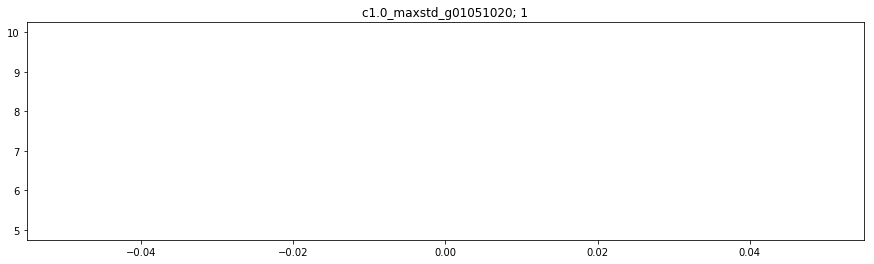

<Figure size 1080x288 with 0 Axes>

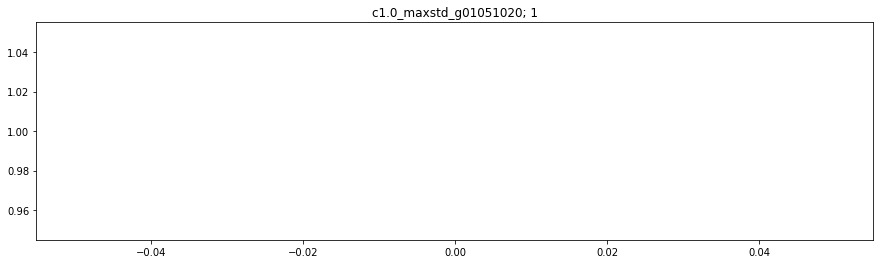

<Figure size 1080x288 with 0 Axes>

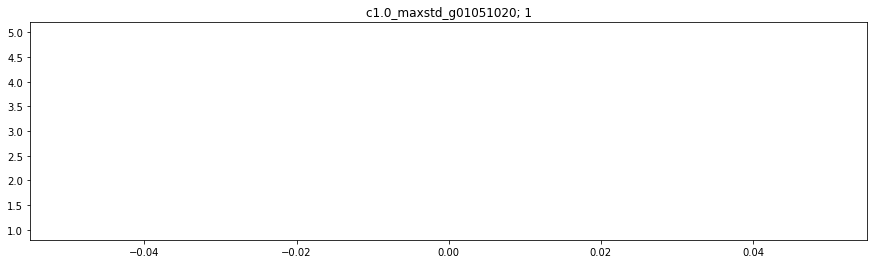

<Figure size 1080x288 with 0 Axes>

In [43]:
ack_iter = 1
for filename in filenames[:3]:
    print(filename)
    for batch_size in batches:
        for experiment in to_eval:
            plt.figure(figsize=(15, 4))
            for stats in arrs[experiment][0]:
                #for i in range(num_acks):
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                #prop_list = stats[filename][batch_size][ack_iter]['logging'][5].numpy()
                prop_list = stats[filename][batch_size][ack_iter]['best_gamma']
                plt.plot(prop_list)
                plt.title(arrs[experiment][1] + "; " + str(ack_iter))

In [31]:
test_properties = [
    'test_log_prob',
    'test_mse',
    'test_kt_corr',
    'test_std_list',
    'test_mse_std_corr'
]

ack_iter = -1
for filename in filenames:
    print(filename)
    for batch_size in [10]:
        for experiment in to_eval:
            m = None
            num_used = 0
            for stats in arrs[experiment][0]:
                #for i in range(num_acks):
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                num_used += 1
                #m += stats[filename][batch_size][ack_iter]['test_std_list'][0].item()
                m2 = np.array([
                    np.exp(stats[filename][batch_size][ack_iter]['ack_labels'].max()-tf_max[filename]),
                    #stats[filename][batch_size][ack_iter]['test_std_list'][0].item(),
                    #stats[filename][batch_size][ack_iter]['test_std_list'][1].item(),
                    #stats[filename][batch_size][ack_iter]['test_std_list'][2].item()
                ])
                if m is None:
                    m = m2
                else:
                    m += m2
            if num_used > 0:
                print(arrs[experiment][1], ":", m/num_used, ";", num_used, "samples")

ARX_L343Q_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.9703925] ; 10 samples
c1.0_g0.0_200epochs_last : [0.9711157] ; 10 samples
BCL6_H676Y_R1_8mers.txt
c1.0_maxstd_g01051020 : [1.] ; 10 samples
c1.0_g0.0_200epochs_last : [0.9940775] ; 10 samples
CRX_E80A_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.5894803] ; 10 samples
c1.0_g0.0_200epochs_last : [0.9260233] ; 10 samples
EGR2_D383Y_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.36053544] ; 10 samples
c1.0_g0.0_200epochs_last : [0.9321119] ; 10 samples
ESX1_K193R_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.9648775] ; 10 samples
c1.0_g0.0_200epochs_last : [0.92595255] ; 10 samples
FOXC1_F112S_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.9920701] ; 10 samples
c1.0_g0.0_200epochs_last : [0.9971632] ; 10 samples
GFI1B_A204T_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.814147] ; 10 samples
c1.0_g0.0_200epochs_last : [0.93335307] ; 10 samples
GFI1_L400F_R1_8mers.txt
c1.0_maxstd_g01051020 : [0.6895327] ; 10 samples
c1.0_g0.0_200epochs_last : [0.7775618] ; 10 samples
HESX1_

In [43]:
num_labels = 32897

In [79]:
to_eval = [
    'take_log_none_ucb_c1.0_g0.0_',
    #'take_log_none_ucb_c2.0_g0.0_',
    'take_log_none_ucb_c1.0_g5.0_',
    'take_log_none_ucb_c1.0_g10.0_',
    'take_log_none_ucb_c1.0_g20.0_',
]

to_eval = [
    'take_log_none_ucb_num_acks_30_c1.0_g0.0_',
    'take_log_none_ucb_num_acks_30_c1.0_g5.0_',
    'take_log_none_ucb_num_acks_30_c1.0_g10.0_',
]

In [81]:
num_acks = 30

In [240]:
to_eval = {
    'take_log_none_ucb_num_acks_30_c1.0_g0.0_': 'Normal',
    'take_log_none_ucb_num_acks_30_c1.0_maxvar_' : 'MOD',
    'take_log_none_ucb_num_acks_30_c1.0_mincorr_' : 'MOD2',
}

to_eval = {
    'take_log_none_ucb_ntest' : 'Normal',
}

In [52]:
to_eval = [
    #'top_val_none_ucb_g0.0_',
    'top_val_none_ucb_g0.0_modelseed',
    #'top_val_none_ucb_maxstd_g01051020_',
    #'top_val_none_ucb_g0.0_200epochs_last_',
    #'top_val_none_ucb_maxvar_g01051020_',
]

/cluster/sj1/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


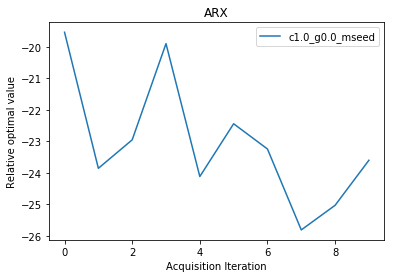

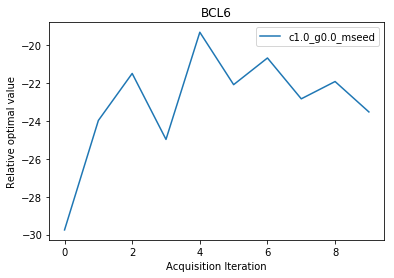

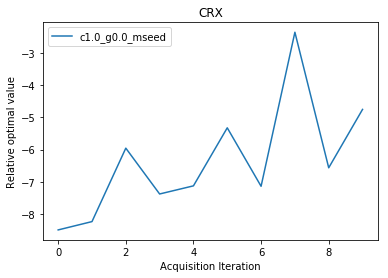

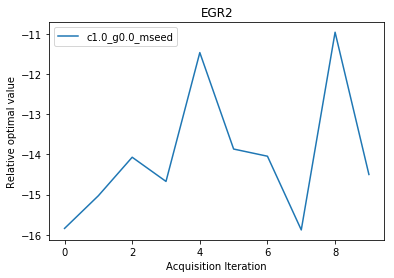

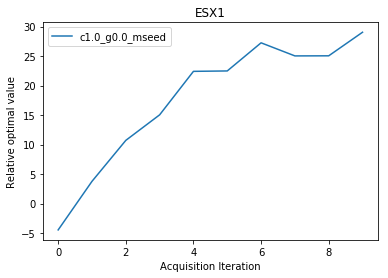

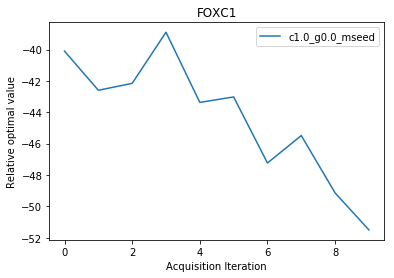

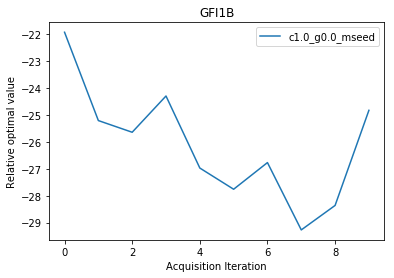

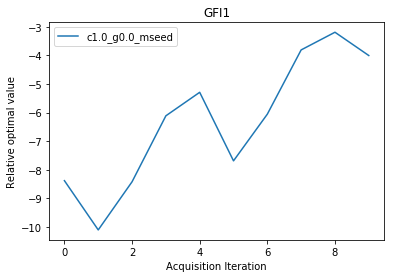

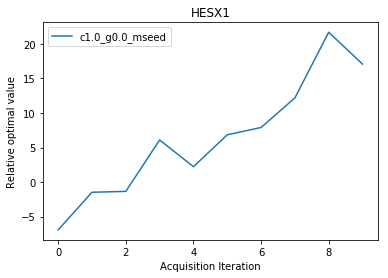

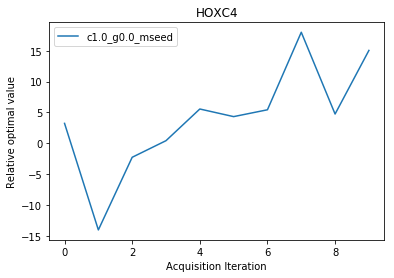

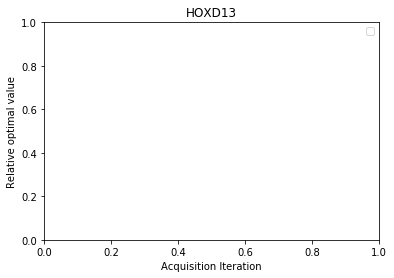

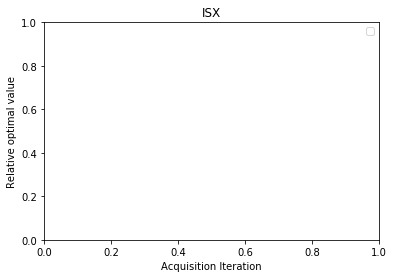

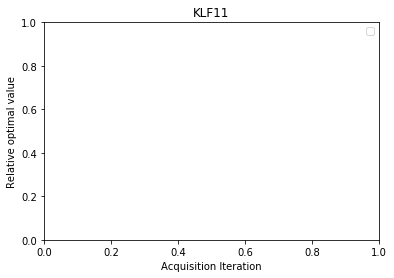

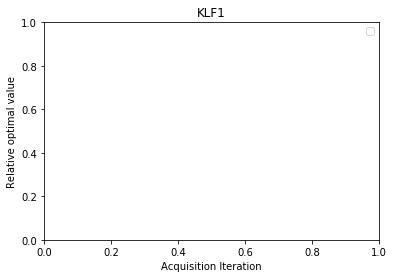

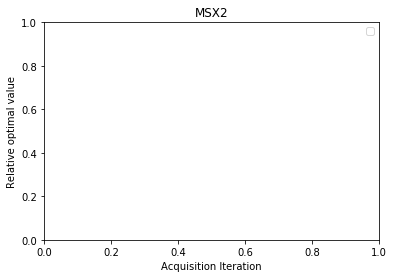

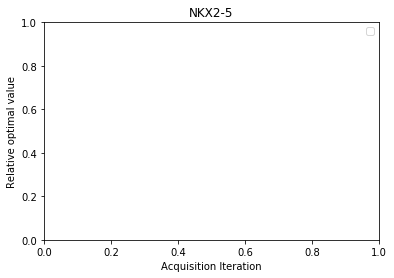

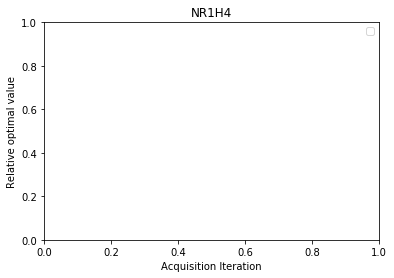

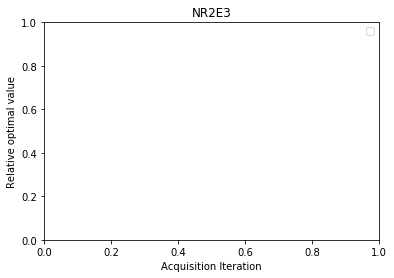

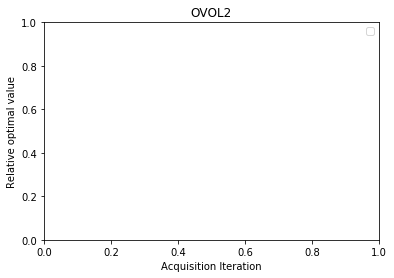

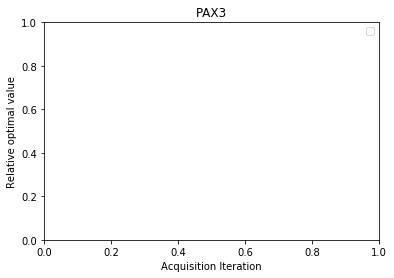

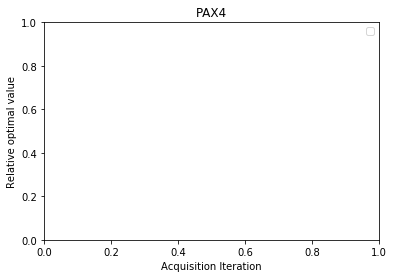

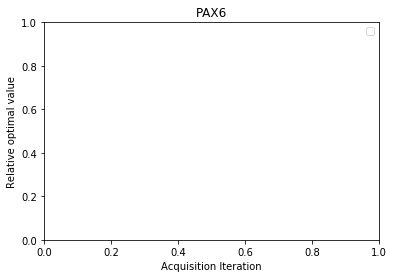

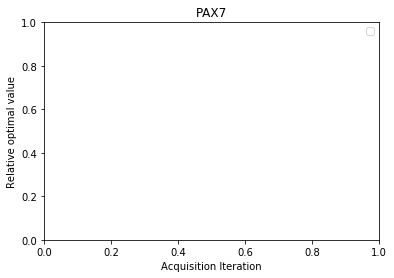

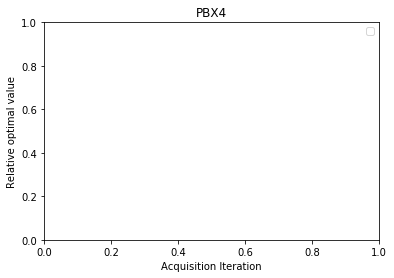

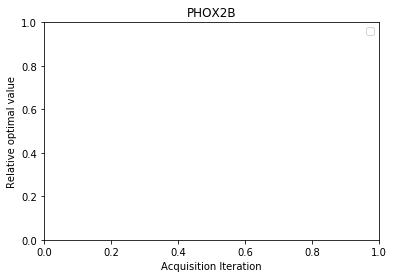

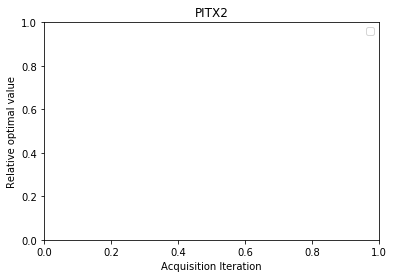

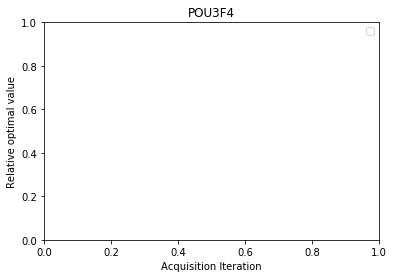

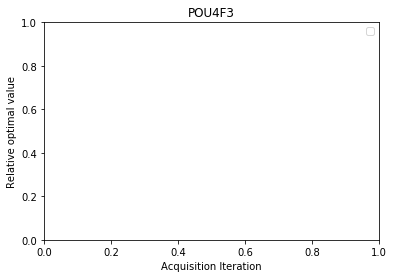

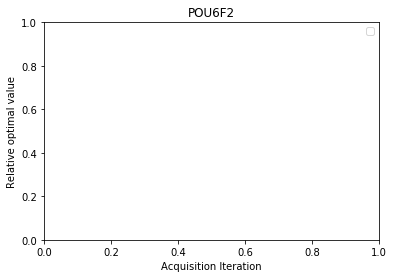

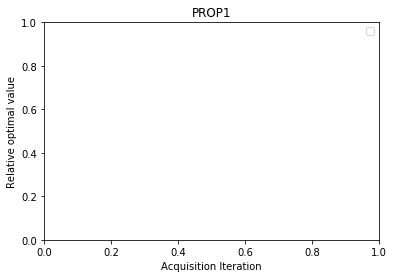

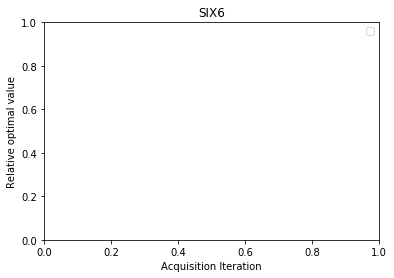

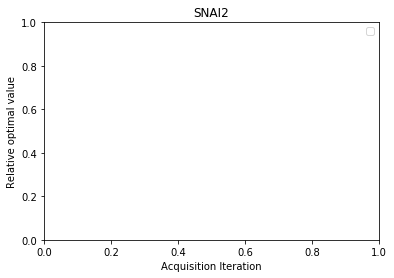

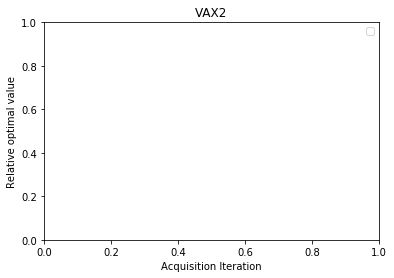

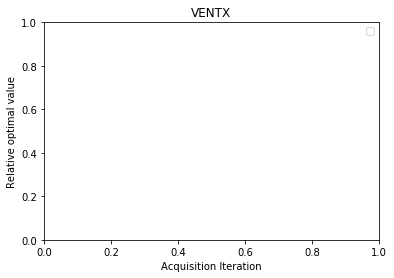

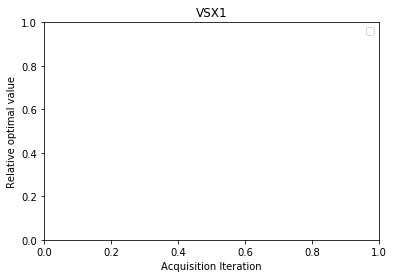

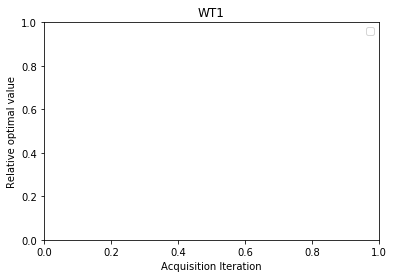

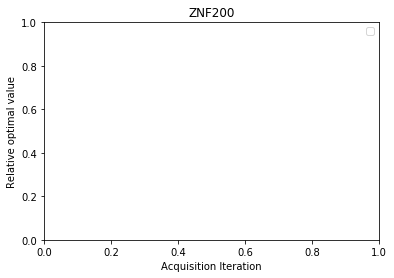

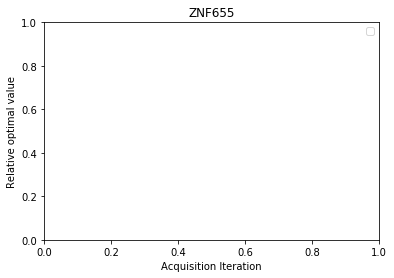

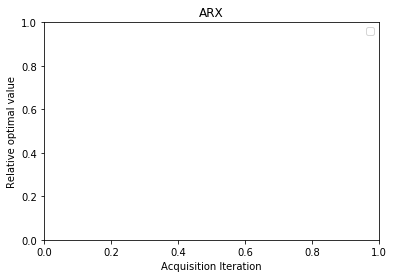

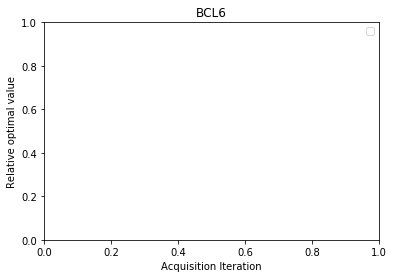

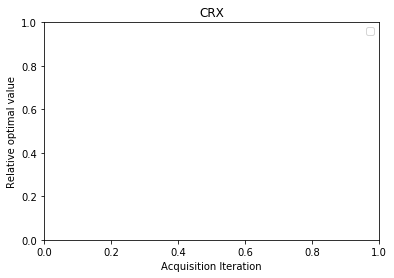

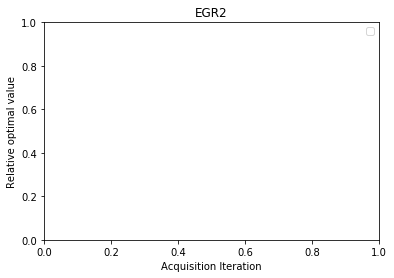

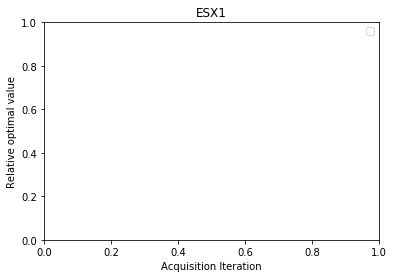

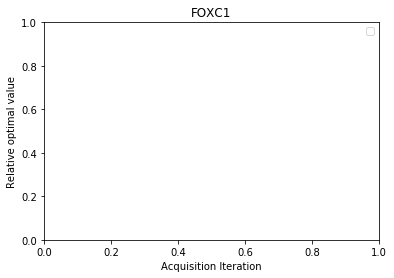

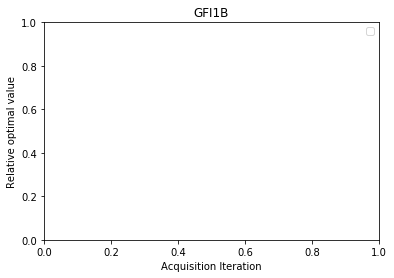

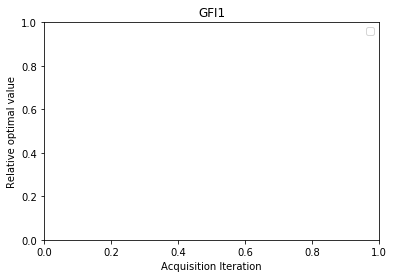

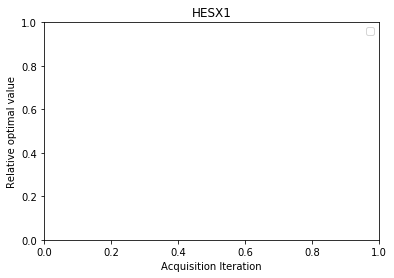

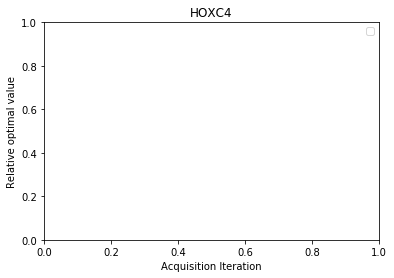

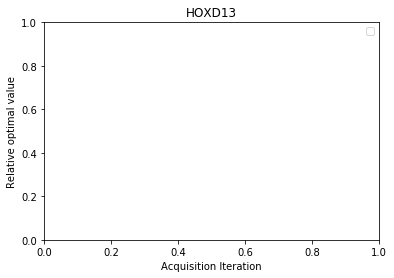

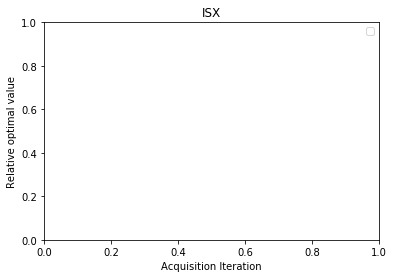

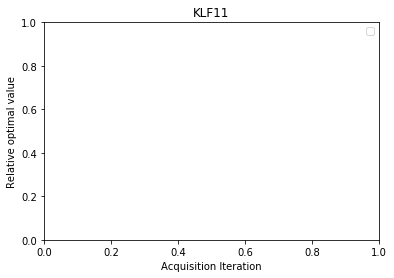

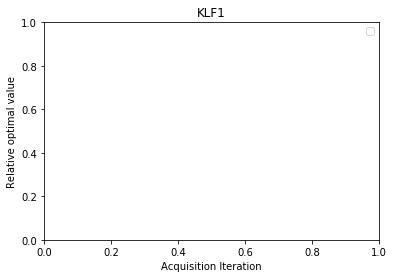

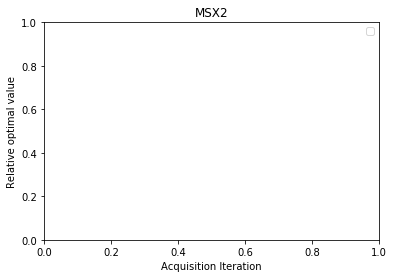

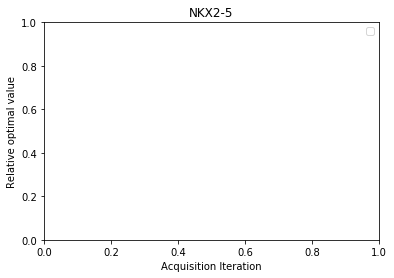

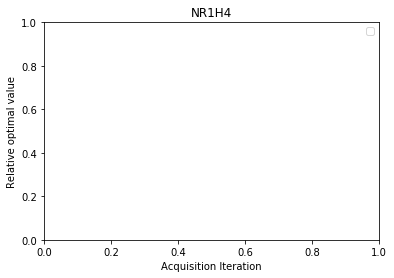

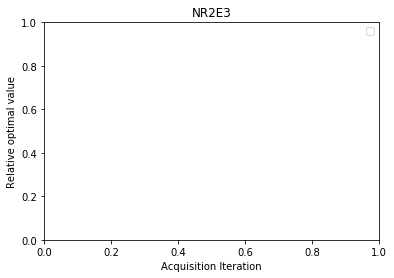

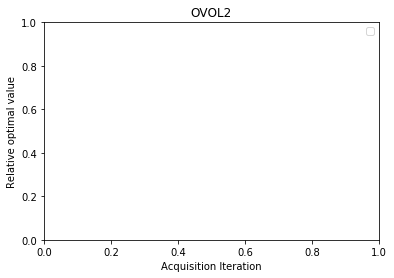

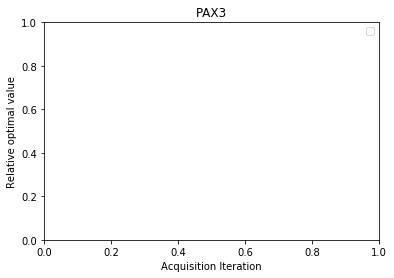

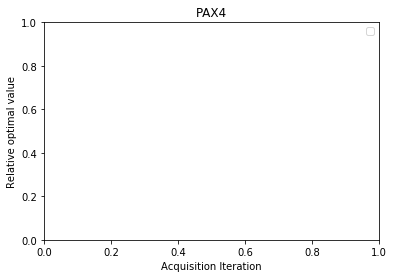

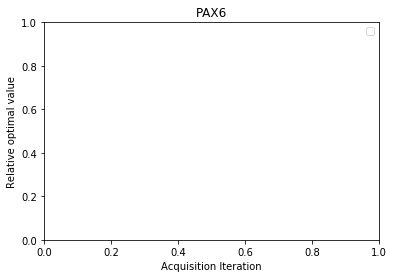

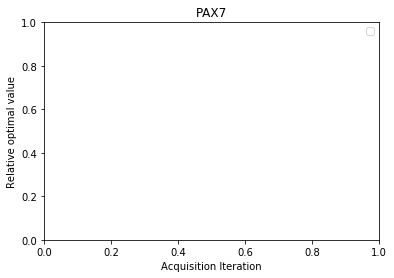

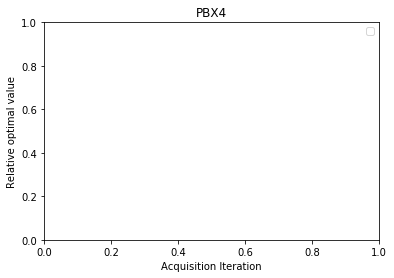

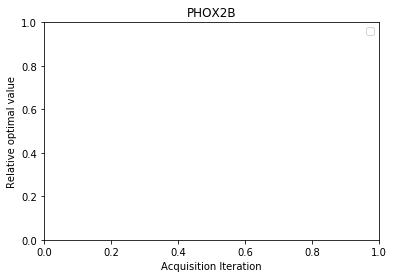

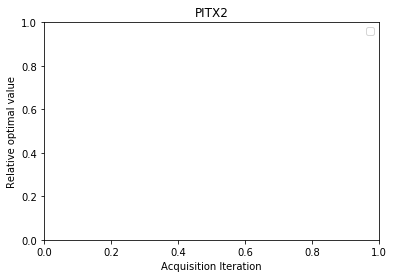

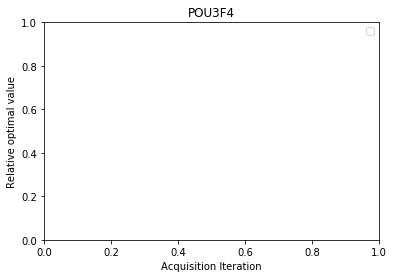

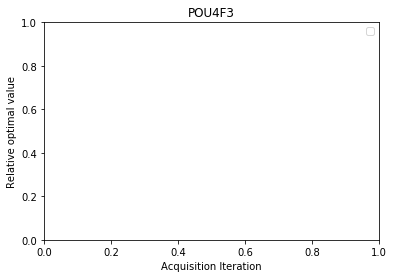

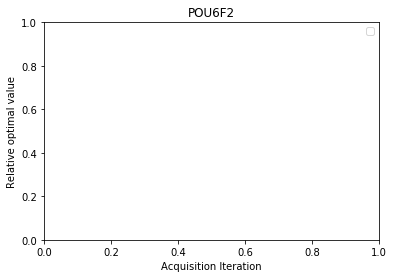

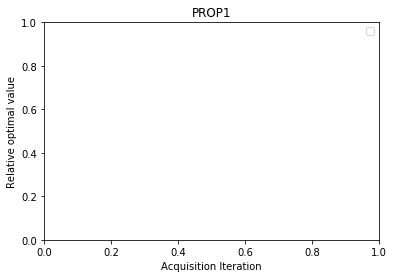

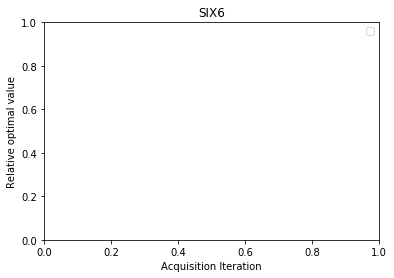

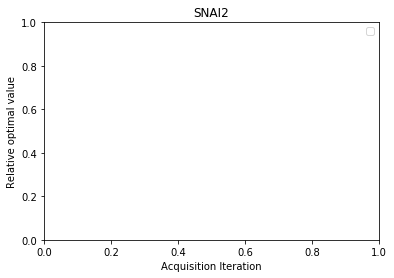

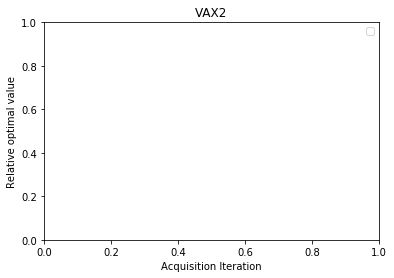

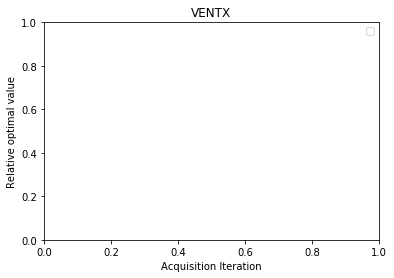

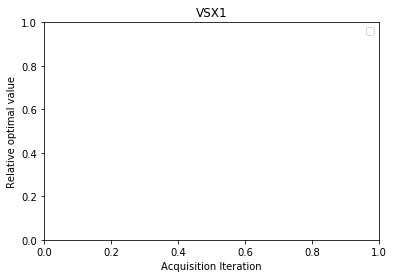

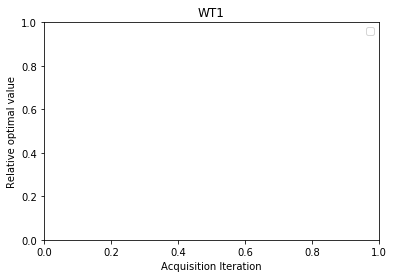

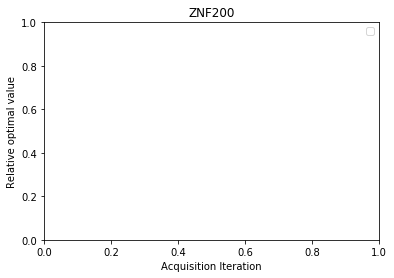

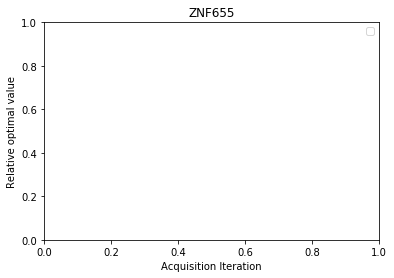

In [53]:
avg = True
num_acks = 10

for batch_size in batches:
    for filename in filenames:
        if avg:
            plt.figure(figsize=(6, 4))
            legend = []
        for experiment in to_eval:
            if not avg:
                plt.figure(figsize=(15, 4))
            prop_list = []
            num_used = 0
            for stats in arrs[experiment][0]:
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                if len(stats[filename][batch_size]) < num_acks:
                    continue
                num_used += 1
                if avg:
                    #prop_list += [np.array([np.exp(stats[filename][batch_size][ack_iter]['ack_labels'].max()-tf_max[filename]) for ack_iter in range(num_acks)])]
                    #prop_list += [np.array([(stats[filename][batch_size][ack_iter]['idx_frac'][0]) for ack_iter in range(num_acks)])]
                    #prop_list += [np.array([(stats[filename][batch_size][ack_iter]['corr_stats'][0][-4]) for ack_iter in range(num_acks)])]
                    prop_list += [np.array([(stats[filename][batch_size][ack_iter]['logging'][0][8]) for ack_iter in range(num_acks)])]
                else:
                    prop_list = [(stats[filename][batch_size][ack_iter]['ack_labels'].max()) for ack_iter in range(num_acks)]
                    prop_list = [np.array([(stats[filename][batch_size][ack_iter]['corr_stats'][0][-4]) for ack_iter in range(num_acks)])]
                if not avg:
                    plt.plot(prop_list)
            if avg and num_used > 0:
                prop_list = np.stack(prop_list, axis=0)
                plt.plot(np.median(prop_list, axis=0))
                legend += [arrs[experiment][1]]
            elif not avg:
                plt.title(arrs[experiment][1] + "; " + str(batch_size) + "; all")
        if avg:
            plt.legend(legend)
            plt.xlabel('Acquisition Iteration')
            plt.ylabel('Relative optimal value')
            #plt.title(filename + "; " + str(batch_size) + "; all")
            plt.title(filename.split("_")[0])

/cluster/sj1/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


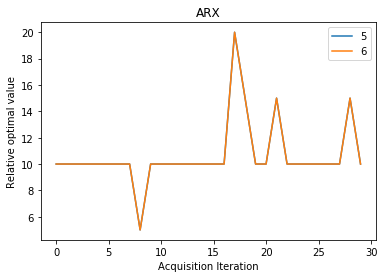

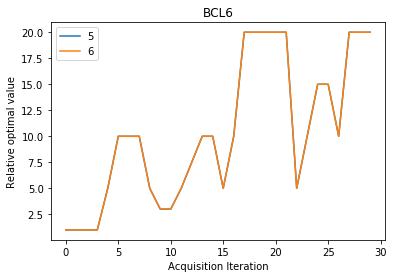

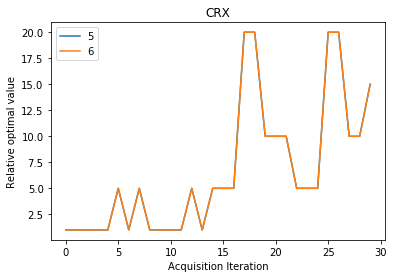

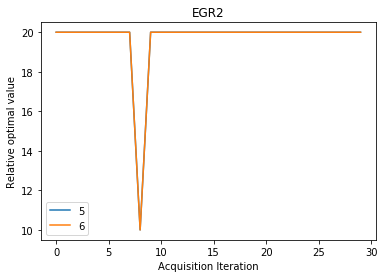

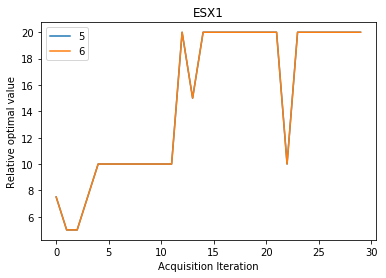

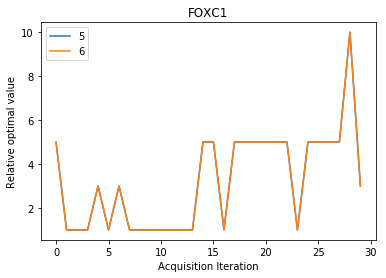

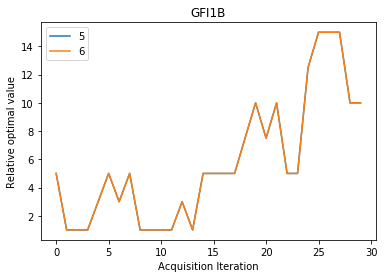

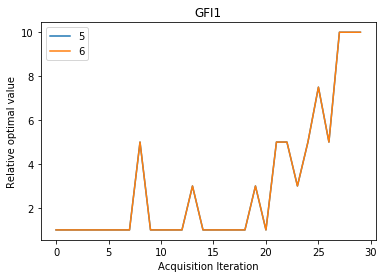

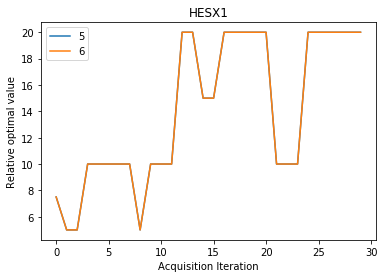

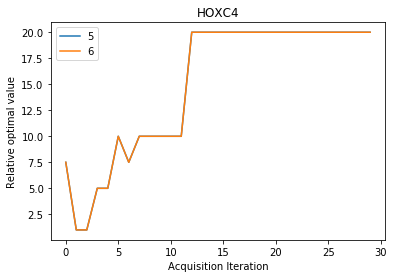

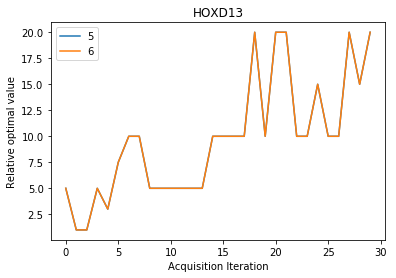

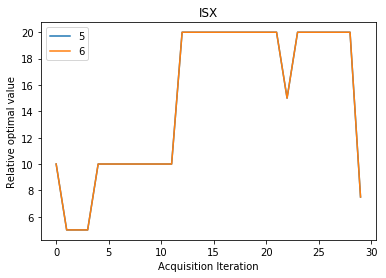

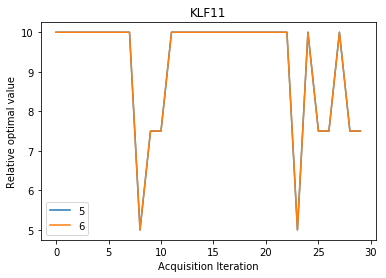

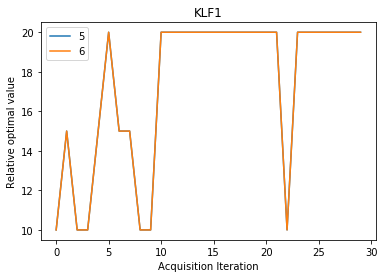

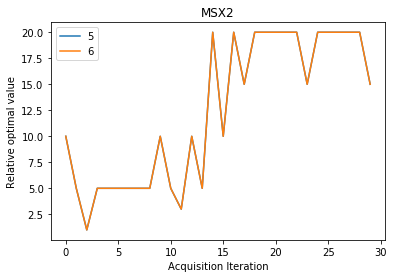

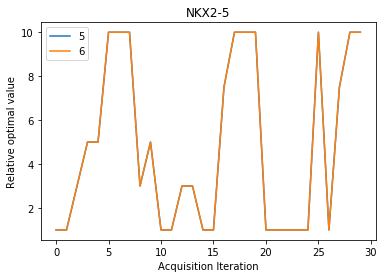

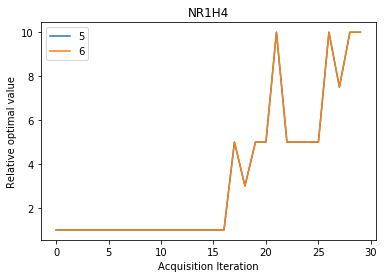

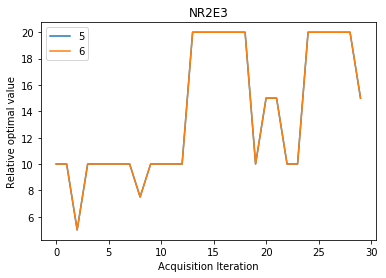

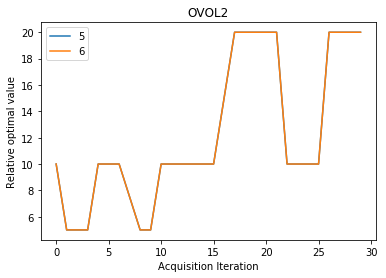

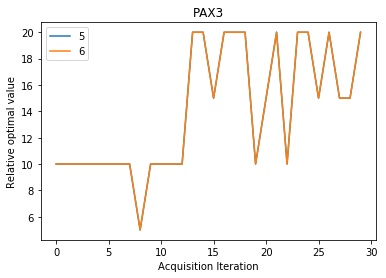

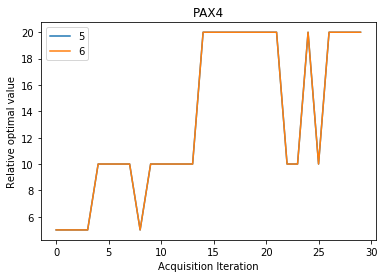

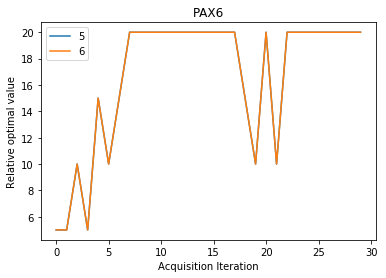

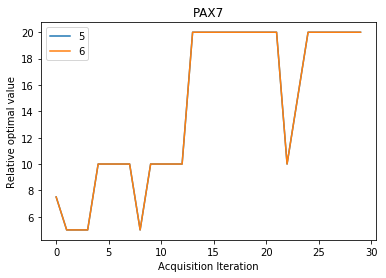

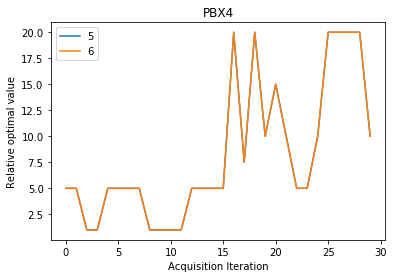

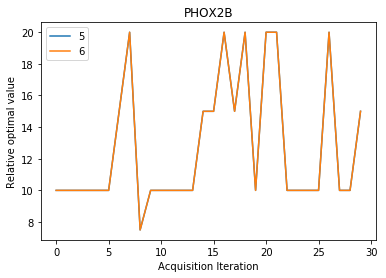

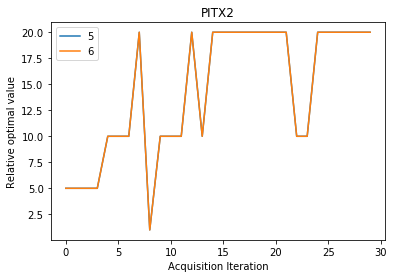

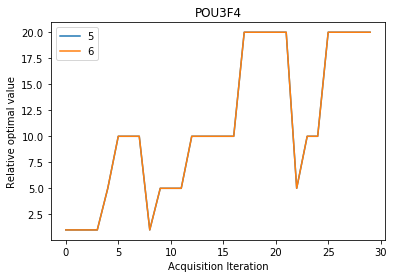

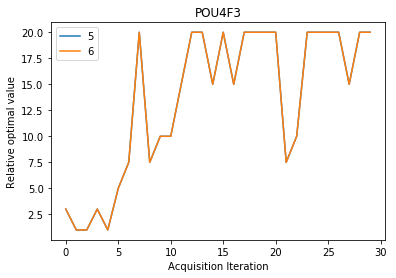

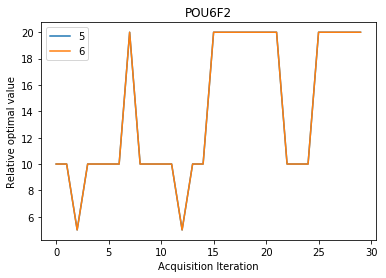

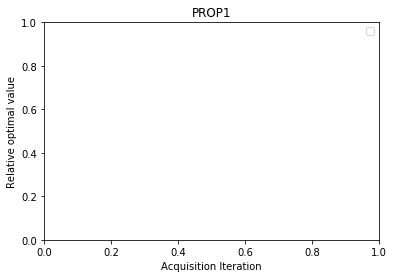

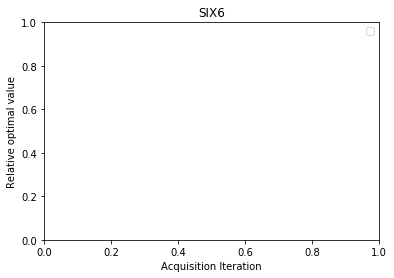

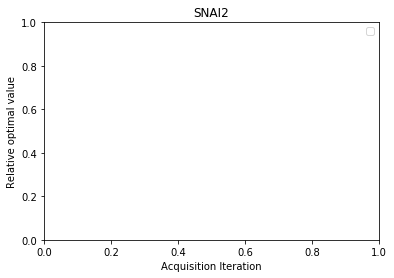

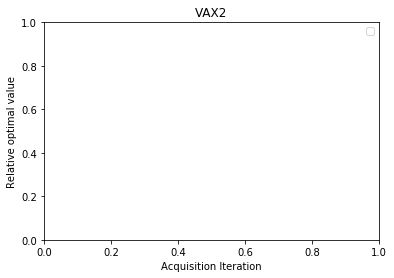

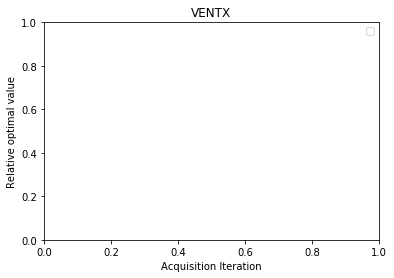

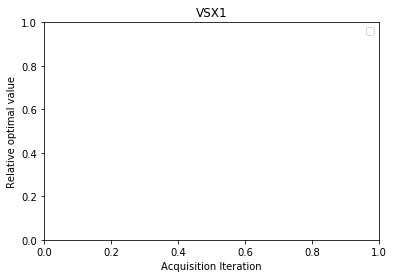

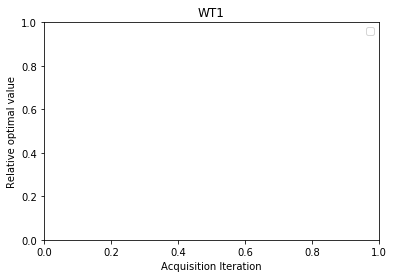

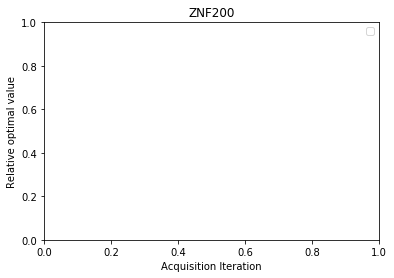

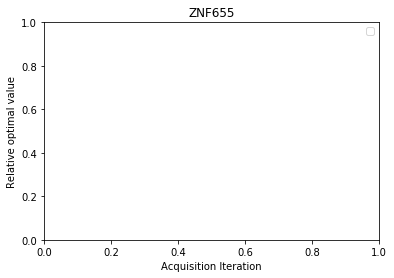

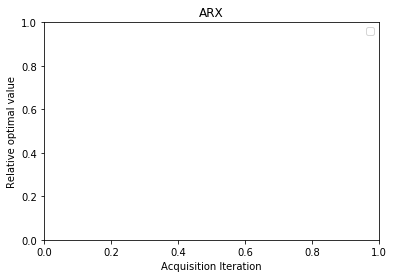

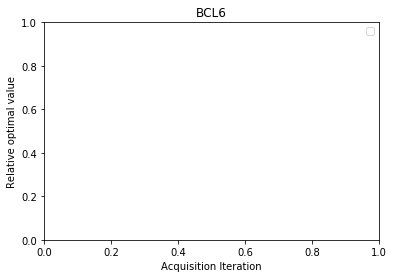

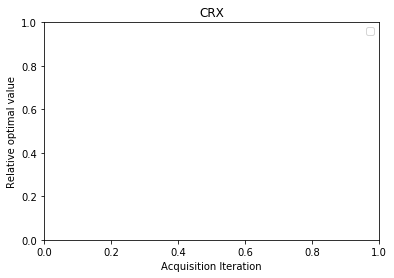

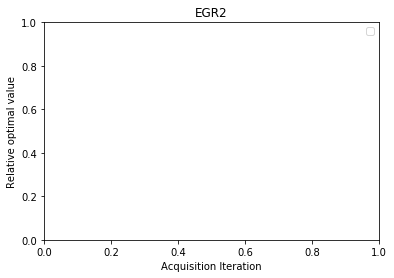

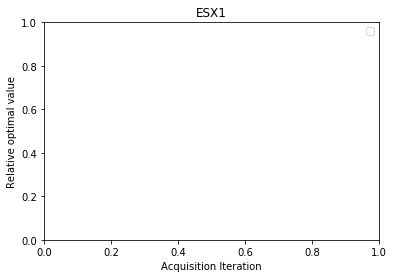

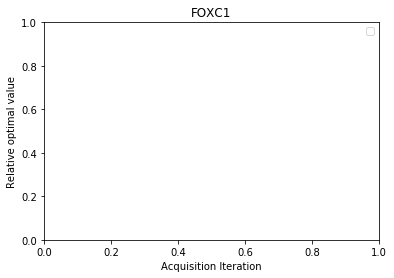

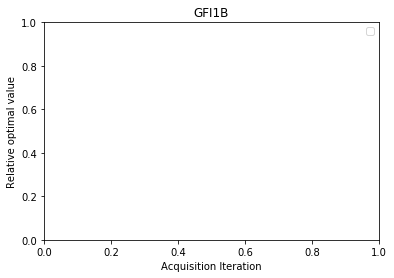

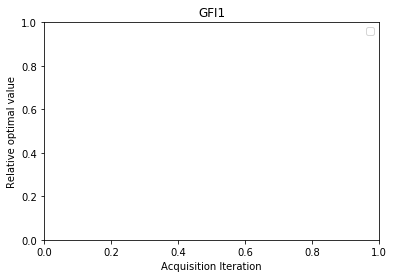

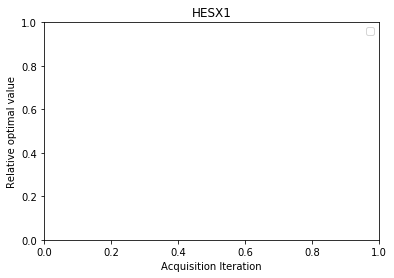

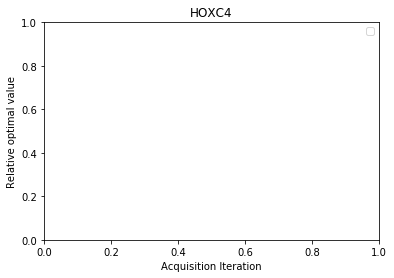

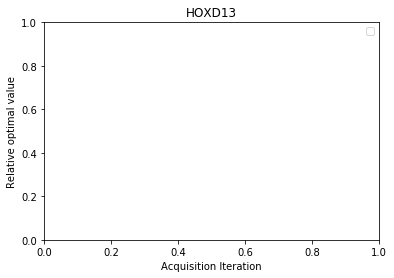

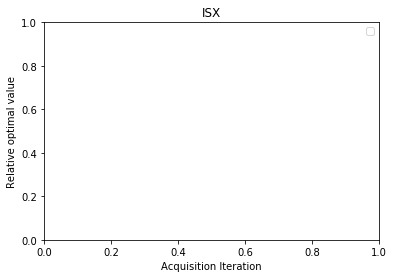

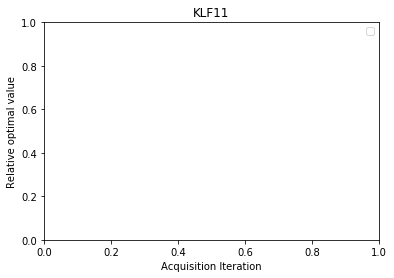

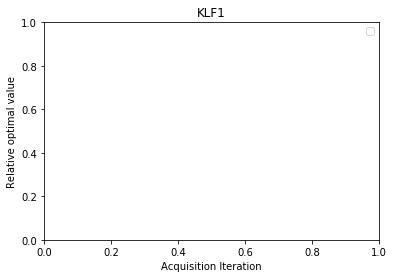

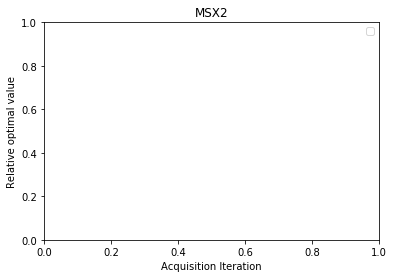

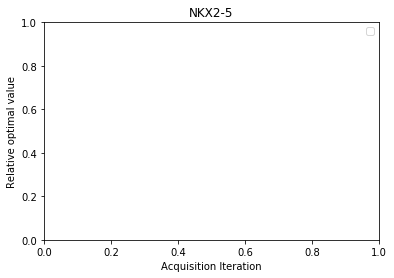

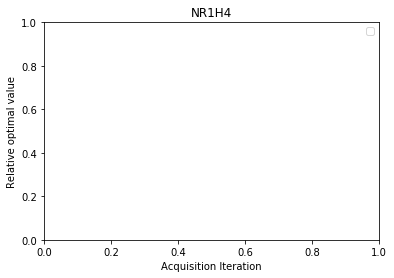

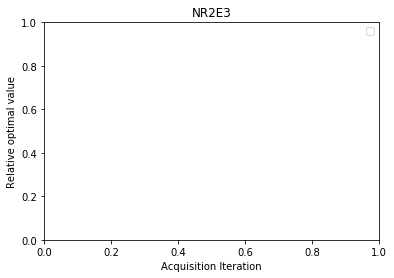

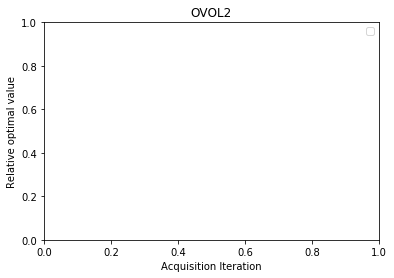

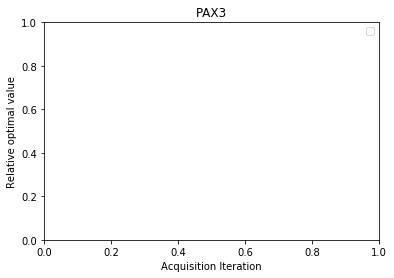

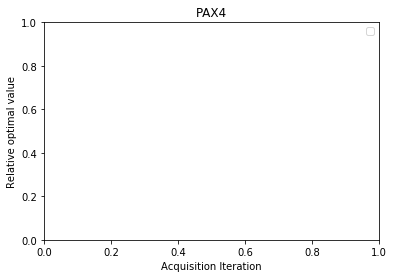

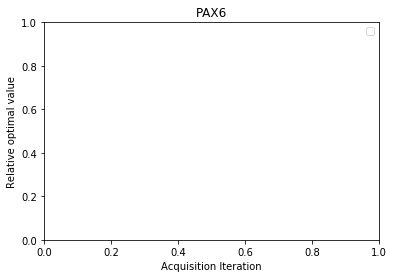

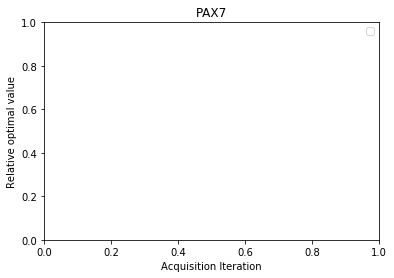

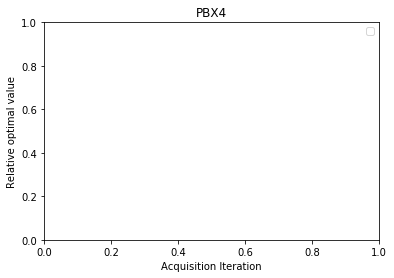

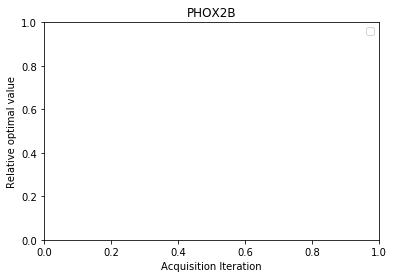

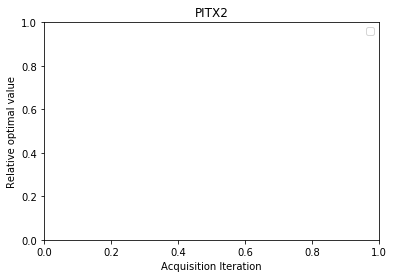

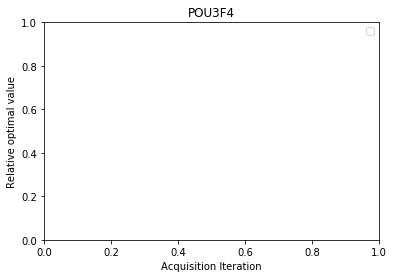

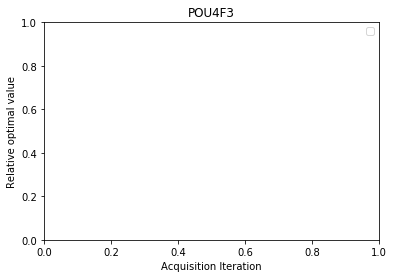

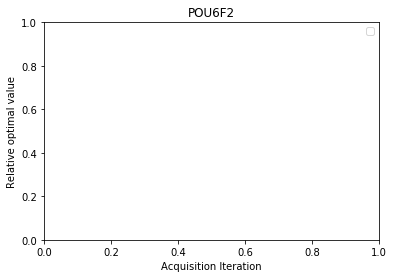

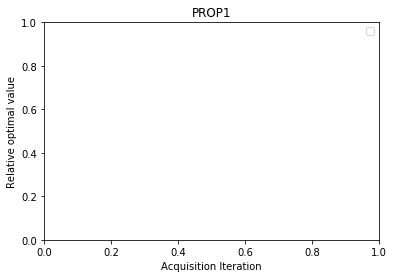

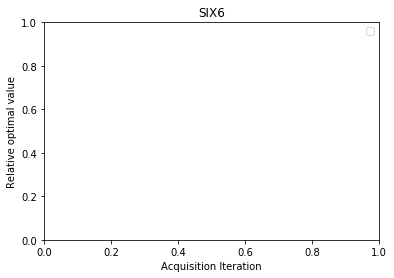

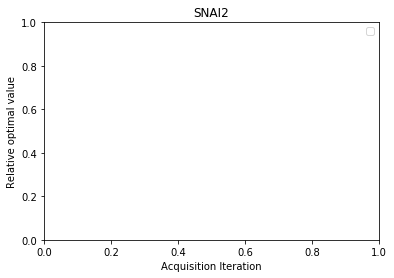

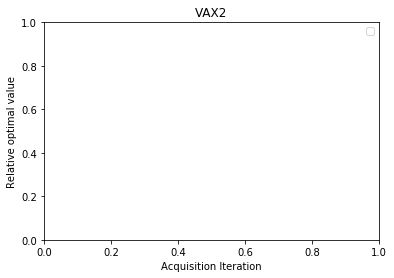

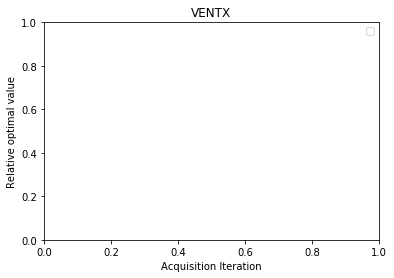

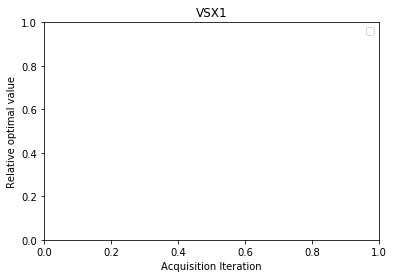

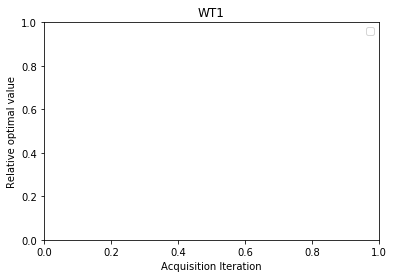

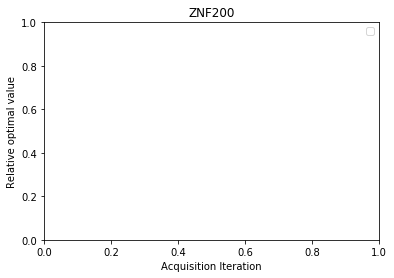

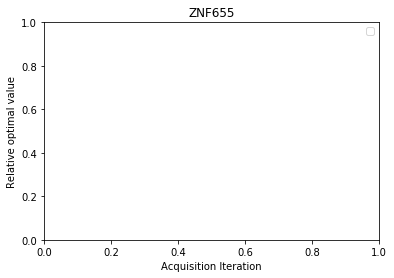

In [44]:
avg = True

for batch_size in batches:
    for filename in filenames:
        if avg:
            plt.figure(figsize=(6, 4))
            legend = []
        for experiment in to_eval:
            if not avg:
                plt.figure(figsize=(15, 4))
                
            for prop_i in [5, 6]:
                prop_list = []
                num_used = 0
                for stats in arrs[experiment][0]:
                    if filename not in stats:
                        continue
                    if batch_size not in stats[filename]:
                        continue
                    if len(stats[filename][batch_size]) < num_acks:
                        continue
                    num_used += 1
                    if avg:
                        #prop_list += [np.array([np.exp(stats[filename][batch_size][ack_iter]['ack_labels'].max()-tf_max[filename]) for ack_iter in range(num_acks)])]
                        #prop_list += [np.array([(stats[filename][batch_size][ack_iter]['idx_frac'][0]) for ack_iter in range(num_acks)])]
                        #prop_list += [np.array([(stats[filename][batch_size][ack_iter]['corr_stats'][1][prop_i].item()) for ack_iter in range(num_acks)])]
                        prop_list += [np.array([(stats[filename][batch_size][ack_iter]['best_gamma']) for ack_iter in range(num_acks)])]
                    else:
                        prop_list = [(stats[filename][batch_size][ack_iter]['ack_labels'].max()) for ack_iter in range(num_acks)]
                        prop_list = [np.array([(stats[filename][batch_size][ack_iter]['corr_stats'][1][prop_i].item()) for ack_iter in range(num_acks)])]
                    if not avg:
                        plt.plot(prop_list)
                if avg and num_used > 0:
                    prop_list = np.stack(prop_list, axis=0)
                    plt.plot(np.median(prop_list, axis=0))
                    legend += [str(prop_i)]
                elif not avg:
                    plt.title(arrs[experiment][1] + "; " + str(batch_size) + "; all")
        if avg:
            plt.legend(legend)
            plt.xlabel('Acquisition Iteration')
            plt.ylabel('Relative optimal value')
            #plt.title(filename + "; " + str(batch_size) + "; all")
            plt.title(filename.split("_")[0])

Text(0, 0.5, 'Relative optimal value')

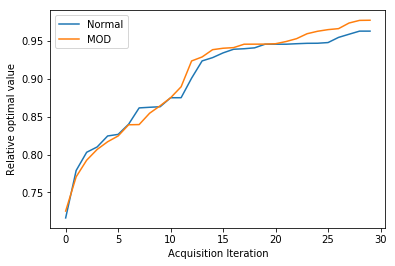

In [178]:
avg = True

plt.figure(figsize=(6, 4))
legend = []
for experiment in to_eval:
    prop_list = []
    for batch_size in [10]:
        for filename in filenames:
            for stats in arrs[experiment][0]:
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                if len(stats[filename][batch_size]) < num_acks:
                    continue
                prop_list += [np.array([np.exp(stats[filename][batch_size][ack_iter]['ack_labels'].max()-tf_max[filename]) for ack_iter in range(num_acks)])]
                #prop_list += [np.array([(stats[filename][batch_size][ack_iter]['idx_frac'][0]) for ack_iter in range(num_acks)])]
    prop_list = np.stack(prop_list, axis=0)
    plt.plot(np.median(prop_list, axis=0))
    #legend += [arrs[experiment][1]]
    legend += [to_eval[experiment]]
plt.legend(legend)
plt.xlabel('Acquisition Iteration')
plt.ylabel('Relative optimal value')